Données:
    - APL par COMMUNE
    - EFFECTIFS par départements

In [2]:
import pandas as pd

In [3]:
effectifs = pd.read_csv('rpps_tab3.csv')

In [4]:
effectifs.head()

,mode_exercice,zone_inscription,annee,specialite,effectifs
0,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Ensemble des spécialités d'exercice,219834
1,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Spécialistes,117694
2,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Anatomie et cytologie pathologiques,1566
3,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Anesthésie-réanimation,10949
4,Ensemble des modes d'exercice,FRANCE ENTIERE,2014,Biologie médicale,2662


In [5]:
apl = pd.read_csv('APL.csv', sep=';')

In [6]:
apl.head()

,Code,Commune,Médecins généralistes libéraux de moins de 40 ans,Chirurgiens dentistes libéraux,Gynécologues libéraux,Infirmiers libéraux,Masseurs kinésithérapeutes,Médecins généralistes libéraux,Ophtalmologues libéraux,Pédiatres libéraux,Pharmacies,Psychiatres libéraux,Sages femmes libérales
0,01001,L'Abergement-Clémenciat,1.638216,20.085826,3.364735,55.016276,25.320489,28.813086,2.850830,1.590976,15.019083,2.741911,4.010980
1,01002,L'Abergement-de-Varey,7.289364,18.008864,3.039796,40.105905,17.305556,30.897007,2.225934,1.634590,15.314518,1.758621,2.137627
2,01004,Ambérieu-en-Bugey,15.031652,60.721345,5.693044,102.608183,104.140882,83.640516,4.621811,1.989170,33.129652,1.793957,3.294920
3,01005,Ambérieux-en-Dombes,3.367792,20.308262,4.767121,99.549329,49.454132,45.647105,3.993522,3.117304,27.532992,4.086741,4.548812
4,01006,Ambléon,0.000000,0.000000,2.433890,0.000000,0.000000,0.000000,1.036200,0.765571,0.000000,0.802731,2.607831


In [7]:
communes = pd.read_csv('liste-des-communes-francaises.csv', sep=';')

In [8]:
communes = communes[communes['Année'] == 2015]

###### Produit cartesien pour ajouter les departements aux APL

In [9]:
communes = communes.drop(columns = ['Nom complet', 'Découpage',
       'Code arrondissement', 'Code canton', 'Type de nom en clair',
       'Nom en clair', 'Nom en clair (typographie riche)', 'Année',
       'Article', 'Charnière'])

In [10]:
communes.head()

,Code INSEE,Chef Lieu,Code région,Code département,Code commune
0,21421,Commune non chef-lieu,26,21,421
1,58094,Commune non chef-lieu,26,58,94
3,53204,Commune non chef-lieu,52,53,204
4,53249,Commune non chef-lieu,52,53,249
5,50458,Commune non chef-lieu,25,50,458


###### On rajoute les code dpartements au df APL par un merge

In [11]:
df_apl_dep = apl.merge(communes, left_on='Code', right_on='Code INSEE')

In [12]:
df_apl_dep.tail()

,Code,Commune,Médecins généralistes libéraux de moins de 40 ans,Chirurgiens dentistes libéraux,Gynécologues libéraux,Infirmiers libéraux,Masseurs kinésithérapeutes,Médecins généralistes libéraux,Ophtalmologues libéraux,Pédiatres libéraux,Pharmacies,Psychiatres libéraux,Sages femmes libérales,Code INSEE,Chef Lieu,Code région,Code département,Code commune
36615,97420,Sainte-Suzanne,1.338764,21.660366,3.398314,247.072872,63.328255,65.498561,3.879197,2.054625,43.061292,1.338089,8.448160,97420,Commune non chef-lieu,4,974,20
36616,97421,Salazie,31.502362,14.044339,1.409398,209.965958,13.332042,81.906140,1.459770,0.903072,53.572213,0.572592,4.042656,97421,Commune non chef-lieu,4,974,21
36617,97422,Le Tampon,19.611133,41.090144,4.891555,266.103946,127.789520,92.759740,4.659462,2.203977,35.303743,3.189436,10.169957,97422,Commune bureau centralisateur de canton,4,974,22
36618,97423,Les Trois-Bassins,32.385605,58.404493,2.142848,249.442031,150.308271,92.298975,3.960347,1.389514,36.608096,2.312730,6.978683,97423,Commune non chef-lieu,4,974,23
36619,97424,Cilaos,0.000000,28.817626,0.364622,180.200198,22.493978,75.606220,0.392365,0.112068,42.062410,0.253635,0.779680,97424,Commune non chef-lieu,4,974,24


### On regrooupe les effectifs par an

In [13]:
eff_an = effectifs.groupby(['annee']).count()

In [14]:
print(eff_an)

       mode_exercice  zone_inscription  specialite  effectifs
annee                                                        
2013           28820             28820       28820      28820
2014           28820             28820       28820      28820


-------------------------------

Il y a moins de specialites specifies dans le fichier apl

In [15]:
len(effectifs.groupby('specialite').count())

44

In [16]:
specialites = apl.columns.values

In [17]:
len(specialites)

13

In [18]:
effectifs_2014 = effectifs[effectifs['annee']==2014]

In [19]:
effectifs_emsemble = effectifs_2014[effectifs_2014['mode_exercice'] == "Ensemble des modes d'exercice"].drop(columns=['mode_exercice', 'annee'])

In [20]:
effectifs_2014_pivot = effectifs_emsemble.pivot(index='zone_inscription', columns='specialite', values='effectifs')

In [21]:
effectifs_dep = effectifs_emsemble.groupby('zone_inscription').sum()

In [22]:
def get_code_dep(df_row):
    
    return df_row.name[0:2]

In [23]:
effectifs_dep['Code_dep'] = effectifs_dep.apply(get_code_dep, axis=1)

In [24]:
len(effectifs_dep)

131

In [25]:
effectifs_dep.head()

,effectifs,Code_dep
zone_inscription,,
01 - Ain,3609,01
02 - Aisne,3705,02
03 - Allier,2898,03
04 - Alpes-de-Haute-Provence,1455,04
05 - Hautes-Alpes,1719,05


###### On calcule les APL par département 

In [33]:
df_apl_dep_sum = df_apl_dep.groupby('Code département').sum()

In [34]:
df_apl_dep_sum.head()

,Médecins généralistes libéraux de moins de 40 ans,Chirurgiens dentistes libéraux,Gynécologues libéraux,Infirmiers libéraux,Masseurs kinésithérapeutes,Médecins généralistes libéraux,Ophtalmologues libéraux,Pédiatres libéraux,Pharmacies,Psychiatres libéraux,Sages femmes libérales,Code région,Code commune
Code département,,,,,,,,,,,,,
01,1934.968402,10517.710253,1585.891453,26054.433205,14818.927244,16694.944842,1297.814407,816.719325,9181.277093,1205.961082,1508.311792,34358,96341
02,3196.458616,15870.993975,2805.436971,50903.578881,18453.559791,38615.178722,2700.305996,1206.391223,20018.364235,1543.402126,1054.606786,17952,340904
03,1192.642384,7457.068393,647.256069,18185.597079,9971.743251,13252.579473,984.018979,288.569848,9888.075945,811.919676,365.284124,26560,51482
04,473.023089,3529.575554,326.182843,16380.933011,9354.873731,8730.951316,542.646209,213.326434,4432.365386,387.136322,378.936069,18600,24873
05,764.463228,3278.146757,162.486105,13301.209702,9366.531175,9457.188077,450.516137,275.369460,4848.248379,255.743263,553.871575,15996,16215


In [32]:
df_apl_dep.head()

,Code,Commune,Médecins généralistes libéraux de moins de 40 ans,Chirurgiens dentistes libéraux,Gynécologues libéraux,Infirmiers libéraux,Masseurs kinésithérapeutes,Médecins généralistes libéraux,Ophtalmologues libéraux,Pédiatres libéraux,Pharmacies,Psychiatres libéraux,Sages femmes libérales,Code INSEE,Chef Lieu,Code région,Code département,Code commune
0,01001,L'Abergement-Clémenciat,1.638216,20.085826,3.364735,55.016276,25.320489,28.813086,2.850830,1.590976,15.019083,2.741911,4.010980,01001,Commune non chef-lieu,82,01,1
1,01002,L'Abergement-de-Varey,7.289364,18.008864,3.039796,40.105905,17.305556,30.897007,2.225934,1.634590,15.314518,1.758621,2.137627,01002,Commune non chef-lieu,82,01,2
2,01004,Ambérieu-en-Bugey,15.031652,60.721345,5.693044,102.608183,104.140882,83.640516,4.621811,1.989170,33.129652,1.793957,3.294920,01004,Commune bureau centralisateur de canton,82,01,4
3,01005,Ambérieux-en-Dombes,3.367792,20.308262,4.767121,99.549329,49.454132,45.647105,3.993522,3.117304,27.532992,4.086741,4.548812,01005,Commune non chef-lieu,82,01,5
4,01006,Ambléon,0.000000,0.000000,2.433890,0.000000,0.000000,0.000000,1.036200,0.765571,0.000000,0.802731,2.607831,01006,Commune non chef-lieu,82,01,6


In [28]:
df_apl_eff_dep = df_apl_dep.merge(effectifs_dep, left_on='Code département', right_on='Code_dep')

In [41]:
effectifs_dep['zone_inscription'] = effectifs_dep.index

In [43]:
effectifs_dep = effectifs_dep.set_index('Code_dep')

In [44]:
effectifs_dep.head()

,effectifs,zone_inscription
Code_dep,,
01,3609,01 - Ain
02,3705,02 - Aisne
03,2898,03 - Allier
04,1455,04 - Alpes-de-Haute-Provence
05,1719,05 - Hautes-Alpes


-----------------------------

###### On merge dans un même dataframe les APL et les EFFECTIFS par DEPARTEMENT

In [45]:
df_apl_eff_dep = df_apl_dep_sum.join(effectifs_dep)

In [46]:
df_apl_eff_dep.head()

,Médecins généralistes libéraux de moins de 40 ans,Chirurgiens dentistes libéraux,Gynécologues libéraux,Infirmiers libéraux,Masseurs kinésithérapeutes,Médecins généralistes libéraux,Ophtalmologues libéraux,Pédiatres libéraux,Pharmacies,Psychiatres libéraux,Sages femmes libérales,Code région,Code commune,effectifs,zone_inscription
01,1934.968402,10517.710253,1585.891453,26054.433205,14818.927244,16694.944842,1297.814407,816.719325,9181.277093,1205.961082,1508.311792,34358,96341,3609.0,01 - Ain
02,3196.458616,15870.993975,2805.436971,50903.578881,18453.559791,38615.178722,2700.305996,1206.391223,20018.364235,1543.402126,1054.606786,17952,340904,3705.0,02 - Aisne
03,1192.642384,7457.068393,647.256069,18185.597079,9971.743251,13252.579473,984.018979,288.569848,9888.075945,811.919676,365.284124,26560,51482,2898.0,03 - Allier
04,473.023089,3529.575554,326.182843,16380.933011,9354.873731,8730.951316,542.646209,213.326434,4432.365386,387.136322,378.936069,18600,24873,1455.0,04 - Alpes-de-Haute-Provence
05,764.463228,3278.146757,162.486105,13301.209702,9366.531175,9457.188077,450.516137,275.369460,4848.248379,255.743263,553.871575,15996,16215,1719.0,05 - Hautes-Alpes


###### PLOTING 

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

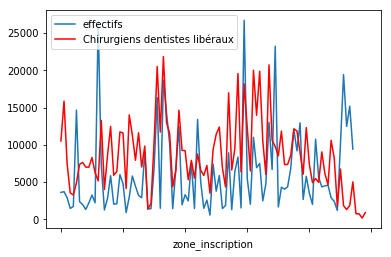

In [49]:
# gca stands for 'get current axis'
ax = plt.gca()

df_apl_eff_dep.plot(kind='line',x='zone_inscription',y='effectifs', ax=ax)
df_apl_eff_dep.plot(kind='line',x='zone_inscription',y='Chirurgiens dentistes libéraux', color='red', ax=ax)

plt.show()

In [50]:
t = df_apl_eff_dep['zone_inscription']
s1 = df_apl_eff_dep['effectifs']
s2 = df_apl_eff_dep['Chirurgiens dentistes libéraux']

In [51]:
dt = 0.01

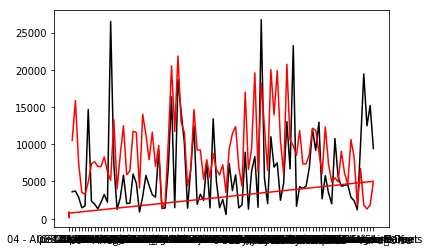

In [60]:
plt.figure()
plt.subplot(111)
plt.plot(t, s1, color='black')
plt.plot(t, s2, color='red')

"""
plt.subplot(212)
plt.plot(t, s2, color='tab:orange', linestyle='--')
plt.show()
"""
plt.show()